# Search a 2D Matrix 

You are given an $m x n$ integer matrix called `matrix` with the following two properties:
- Each row is sorted in non-decreasing order
- The first integer of each row is greater than the last integer of the previous row

Given an integer `target`, return `true` if `target` is in `matrix` or `false` otherwise.

You must write a solution in $O(log(m*n))$ time complexity

#### Example 1

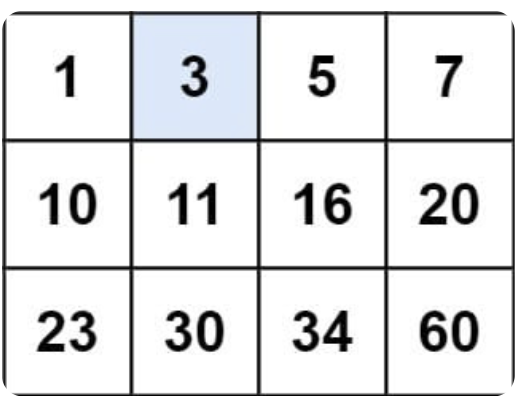

```
Input: matrix = [[1,3,5,7], [10,11,16,20], [23,30,34,60]], target = 3
Output = true
```

#### Example 2

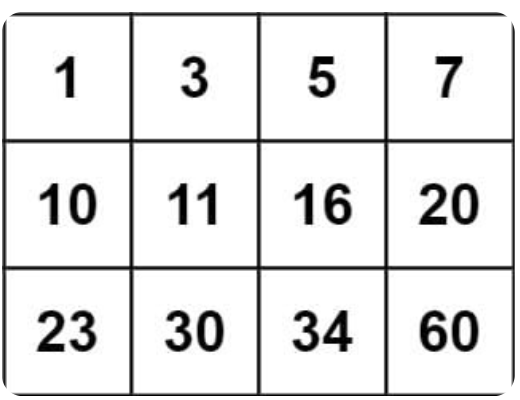

```
Input: matrix = [[1,3,5,7], [10,11,16,20], [23,30,34,60]], target = 13
Output = false
```

### Brute force solution

In [1]:
def search_2d_matrix(matrix, target:int) -> bool:
    for r in range(len(matrix)):
        for c in range(len(matrix[r])):
            # Just check whether the target number is present:
            if matrix[r][c] == target:
                return True
    # If the target has not been found return False
    return False


matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
print(search_2d_matrix(matrix, 3))

True


Time Complexity: $O(n^2)$

In [19]:
def search_2d_matrix(matrix, target:int) -> bool:
    # Loop through the first elements of each row
    for r in range(len(matrix)):
        if target >= matrix[r][0]:
            valid_row = r
    # Now that we have the row in which we can find the number, I can do binary search to find it. 
    start = 0
    end = len(matrix[valid_row]) - 1
    while start <= end:
        mid = (end + start) // 2
        if matrix[valid_row][mid] == target:
            return True
        elif target < matrix[valid_row][mid]:
            end = mid - 1
        else:
            start = mid + 1
    return False

# matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
# matrix = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]]
matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
print(search_2d_matrix(matrix, 20))

True


### InstaByte Solution

The matrix has special properties where each row is sorted and the first element of each row is greater than the last element of the previous row.

This means that matrix is sorted if you go from top left to bottom right, row by row. So we can treat this 2D matrix as a sorted 1D array and use Binary Search to find the target. 

The key is to convert the middle index of binary search into corresponding row and column indices of the matrix. 

To convert a 1D index to 2D indices we can use:

- row = index / number of columns
- column = index % number of columns 

The time complexity of this solution is $O(Log(m * n))$ as we are performing binary search on $m * n$ elements. 

In [21]:
def searchMatrix(matrix, target):
    # Get dimensions of matrix 
    m, n = len(matrix), len(matrix[0])

    # Initialize binary search boundaries
    left, right = 0, m * n - 1

    # Perform binary search
    while left <= right:
        mid = (left + right) // 2
        # Convert 1D index to 2D indices
        row = mid // n
        col = mid % n

        # Compare current element with target
        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            left = mid + 1
        else:
            right = mid - 1
    return False

# matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
# matrix = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]]
matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
print(searchMatrix(matrix, 17))

False
